In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### Laoding the data Set

In [3]:
df = pd.read_csv("mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.drop(['car name'], axis=1, inplace=True)

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
## Summer of the Data Set

In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
## Data Pre processing

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
df = df[df.horsepower != '?']

In [13]:
'?'in df

False

In [14]:
df.shape

(392, 8)

In [15]:
## Corelation matrix

In [16]:
df.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

In [17]:
## Ploting heat Map of the Corelation

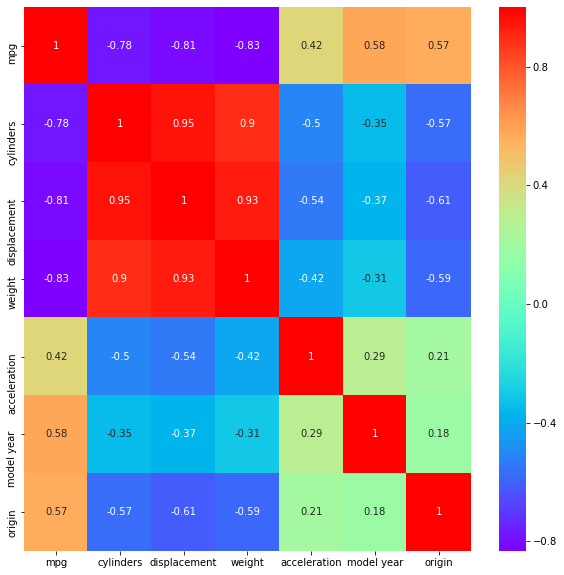

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [19]:
## Univariate Analysis

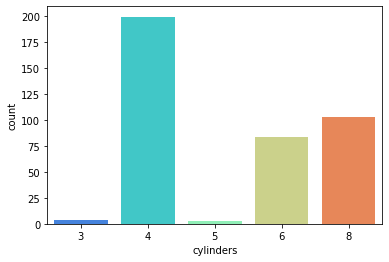

In [20]:
sns.countplot(df.cylinders, data=df, palette='rainbow')
plt.show()

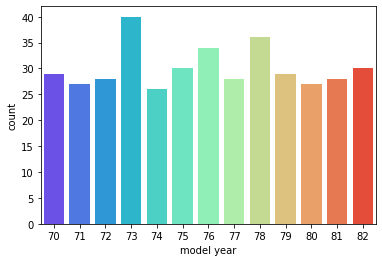

In [21]:
sns.countplot(df['model year'], palette='rainbow')
plt.show()

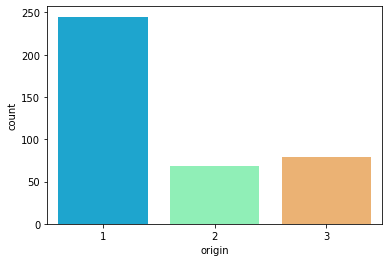

In [22]:
sns.countplot(df['origin'], palette='rainbow')
plt.show()

In [23]:
### Multivariate Alnlysis

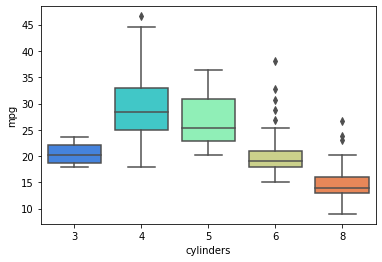

In [24]:
sns.boxplot(y='mpg', x='cylinders', data=df, palette='rainbow')
plt.show()

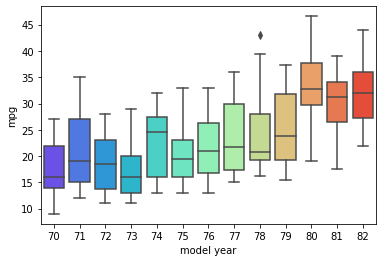

In [25]:
sns.boxplot(y='mpg', x='model year', data=df, palette='rainbow')
plt.show()

In [26]:
## Modelling My data set

x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [27]:
## Data Slip into Train and test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
## Build the Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pres = regression.predict(x_test)

In [34]:
regression.score(x_test, y_test)

0.8191428142279116

In [ ]:
## implementing Ploynamial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)

In [38]:
x_train, x_test, y_train, y_test= train_test_split(x_poly,y, test_size=0.3, random_state=0)

lin_regression = LinearRegression()
lin_regression.fit(x_train, y_train)

print(lin_regression.score(x_test, y_test))

0.8342085923755173


In [39]:
### Conclusion

In [41]:
#Accuracy score improves in the case of polynomial regression, because it fits data much better. 